In [1]:
import h5py
import numpy as np
import os
from PIL import Image
from matplotlib import pyplot as plt
import tensorflow as tf

In [2]:
# load dataset
dataset_path = 'data/nyu_depth_v2_labeled.mat'
f = h5py.File(dataset_path)
images = f['images']
depths = f['depths']

In [3]:
print('images: %s\ndepths: %s' %(images.shape, depths.shape))

images: (1449, 3, 640, 480)
depths: (1449, 640, 480)


(480, 640)
depths: min = 1.7986, max = 3.61564, mean = 2.87957


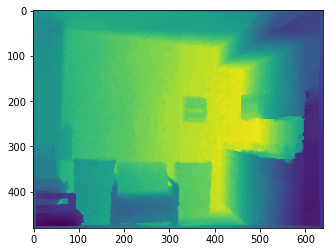

In [5]:
dep = depths[0].transpose()
print(dep.shape)
print('depths: min = %s, max = %s, mean = %s' % (np.min(dep), np.max(dep), np.mean(dep)))
plt.imshow(dep)
plt.show()

In [7]:
dep.dtype

dtype('float32')

In [29]:
np.save(('%s/%05d' % ('output', 29)), dep)

In [9]:
dep_load = np.load('dep.npy')

In [10]:
np.isclose(dep, dep_load)

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ..., 
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]], dtype=bool)

In [5]:
print('depths: min = %s, max = %s, mean = %s' % (np.min(depths), np.max(depths), np.mean(depths)))

depths: min = 0.7133, max = 9.99547, mean = 2.79631


(3, 640, 480)
(480, 640, 3)


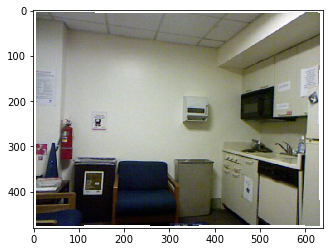

In [23]:
im = images[0]
print(im.shape)
im_ = im.transpose(2,1,0)
print(im_.shape)
plt.imshow(im_)
plt.show()

In [31]:
print('images: min = %s, max = %s, mean = %s' % (np.min(images), np.max(images), np.mean(images)))

images: min = 0, max = 255, mean = 109.117575447


In [24]:
rgb2 = im_[ 45:471, 41:601, : ];
depths2 = dep[ 45:471, 41:601 ];

In [25]:
print(rgb2.shape)
print(depths2.shape)

(426, 560, 3)
(426, 560)


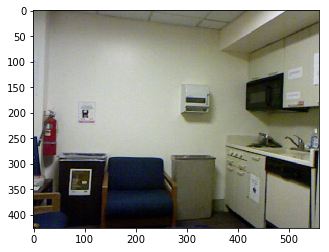

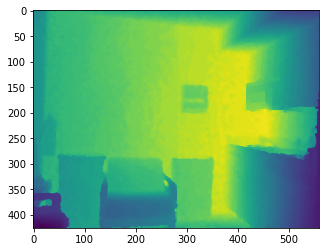

In [26]:
plt.imshow(rgb2)
plt.show()
plt.imshow(depths2)
plt.show()

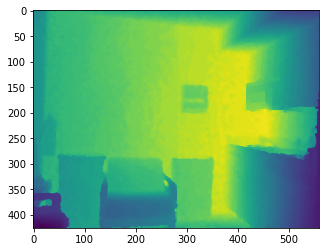

(426, 560)


In [8]:
dep = np.load('data/nyu_datasets/00000.npy')
plt.imshow(dep)
plt.show()
print(dep.shape)

In [43]:
a = np.random.rand(2,2)
a = a.astype('float32')
print(a.dtype)
# np.save('tmp.npy', a)
a.tofile('tmp.bin')

float32


In [44]:
sess = tf.Session()
d = tf.read_file('tmp.bin')
dec = tf.decode_raw(d, tf.float32)
val = sess.run(dec)
print(val)

[ 0.79900819  0.71438873  0.73418272  0.81174099]


In [45]:
val = np.reshape(val, [2,2])
val

array([[ 0.79900819,  0.71438873],
       [ 0.73418272,  0.81174099]], dtype=float32)

In [48]:
a

array([[ 0.79900819,  0.71438873],
       [ 0.73418272,  0.81174099]], dtype=float32)

In [46]:
np.allclose(a, val)

True

In [47]:
a == val

array([[ True,  True],
       [ True,  True]], dtype=bool)